In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [2]:
os.chdir(r'D:\Sagun Shakya\Python\Data-Science-Assignments-master\Data-Science-Assignments-master\02. Pandas\06_Stats\Wind_Stats')

In [3]:
# parse_dates gets 0, 1, 2 columns and parses them as the index.
# '\s+' separates the data values separated by a white space.

wind = pd.read_csv("wind.data", sep = "\s+") 


In [4]:
wind.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### There is a problem that the year is not 2061. Instead it is 1961. We need to fix this.

In [5]:
def yearFixer(yr):
    yr = yr + 1900
        
    return yr

In [6]:
wind['Yr'] = wind['Yr'].apply(yearFixer)
wind.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [7]:
wind['Yr'] = wind['Yr'].astype(str)

In [8]:
wind['Yr'].describe()

count     6574
unique      18
top       1964
freq       366
Name: Yr, dtype: object

In [9]:
wind['Mo'] = wind['Mo'].astype(str)

In [10]:
wind['Dy'] = wind['Dy'].astype(str)

In [11]:
wind['yr_mo_da'] = wind[['Yr', 'Mo', 'Dy']].apply(lambda x: '/'.join(x), axis = 1)

In [12]:
wind.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,yr_mo_da
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961/1/1
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961/1/2
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961/1/3
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961/1/4
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961/1/5


In [13]:
#changing the format to date type.
wind['yr_mo_da'] = pd.to_datetime(wind['yr_mo_da'])

## Making this the index column.

In [14]:
wind = wind.set_index('yr_mo_da')

In [15]:
wind.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
yr_mo_da,,,,,,,,,,,,,,,
1961-01-01,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [16]:
del wind['Yr']
del wind['Mo']
del wind['Dy']

In [17]:
wind.head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
yr_mo_da,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83


## Check for missing values.

In [18]:
wind.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

##  Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
- A single number - A Grand mean.

In [19]:
wind.mean().mean()

10.227982360836924

###  Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.

In [20]:
loc_stats = dict()

loc_stats['loc_min'] = wind.min()
loc_stats['loc_max'] = wind.max()
loc_stats['loc_mean'] = wind.mean()
loc_stats['loc_std'] = wind.std()

In [21]:
pd.DataFrame(loc_stats)

,loc_min,loc_max,loc_mean,loc_std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


### Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [22]:
wind.loc['1961-01-01'].min()

9.29

In [23]:
day_stats = dict()

In [24]:
day_stats['day_min'] = wind.min(axis = 1)
day_stats['day_max'] = wind.max(axis = 1)
day_stats['day_mean'] = wind.mean(axis = 1)
day_stats['day_std'] = wind.std(axis = 1)

In [25]:
pd.DataFrame(day_stats).head()

,day_min,day_max,day_mean,day_std
yr_mo_da,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


### Find the average windspeed in January for each location.
- P.S We should not have deleted the columns named yr, mo, dy in the first place.

In [26]:
#Creating anew column named 'date' stroing the date format. 
#The index column still persists.

wind['date'] = wind.index

In [27]:
#Creating new columns each for year, month and day.

wind['year'] = wind['date'].apply(lambda date: date.year)
wind['month'] = wind['date'].apply(lambda date: date.month)
wind['day'] = wind['date'].apply(lambda date: date.day)


In [28]:
wind.head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,year,month,day
yr_mo_da,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1961,1,1
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02,1961,1,2


In [29]:
#Selecting the entries from the wind dataframe whose month == January.
wind_jan = wind[ wind['month'] == 1]

In [30]:
#Checking the number of rows.
wind_jan.shape

(558, 16)

In [31]:
wind_jan.mean()

RPT        14.847325
VAL        12.914560
ROS        13.299624
KIL         7.199498
SHA        11.667734
BIR         8.054839
DUB        11.819355
CLA         9.512047
MUL         9.543208
CLO        10.053566
BEL        14.550520
MAL        18.028763
year     1969.500000
month       1.000000
day        16.000000
dtype: float64

# DataFrame.query(expr, inplace=False, **kwargs)
- The following are point quesries and are not performing any aggregation like averaging in groups.

### Downsample the record to a yearly frequency for each location.

In [32]:
wind.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,year,month,day
yr_mo_da,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1961,1,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1962,1,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1963,1,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1964,1,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1965,1,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1966,1,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1967,1,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1968,1,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1969,1,1


### Downsample the record to a monthly frequency for each location.

In [33]:
wind.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,year,month,day
yr_mo_da,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1961,1,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,1961,2,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,1961,3,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,1961,4,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,1961,5,1
1961-06-01,15.92,9.59,12.04,8.79,11.54,6.04,9.75,8.29,9.33,10.34,10.67,12.12,1961-06-01,1961,6,1
1961-07-01,7.21,6.83,7.71,4.42,8.46,4.79,6.71,6.00,5.79,7.96,6.96,8.71,1961-07-01,1961,7,1
1961-08-01,9.59,5.09,5.54,4.63,8.29,5.25,4.21,5.25,5.37,5.41,8.38,9.08,1961-08-01,1961,8,1
1961-09-01,5.58,1.13,4.96,3.04,4.25,2.25,4.63,2.71,3.67,6.00,4.79,5.41,1961-09-01,1961,9,1


### Downsample the record to a weekly frequency for each location.

In [34]:
wind[::7]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,year,month,day
yr_mo_da,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1961,1,1
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46,1961-01-08,1961,1,8
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75,1961-01-15,1961,1,15
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92,1961-01-22,1961,1,22
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38,1961-01-29,1961,1,29
1961-02-05,22.00,16.75,19.70,11.63,14.25,12.04,13.96,15.54,13.37,13.13,19.33,14.67,1961-02-05,1961,2,5
1961-02-12,16.00,16.92,17.25,8.38,11.75,10.37,11.71,14.37,10.37,14.62,25.41,17.04,1961-02-12,1961,2,12
1961-02-19,16.17,15.59,13.70,NaN,13.50,10.96,9.62,11.83,11.58,13.67,29.63,20.54,1961-02-19,1961,2,19
1961-02-26,25.80,21.50,22.42,15.21,23.09,16.88,21.17,17.25,18.46,20.04,22.83,23.87,1961-02-26,1961,2,26


### Isolate the years and find the monthly means for those years.

In [35]:
data_1961 = wind.loc[ wind['year'] == 1961]
wind_1961 = data_1961.groupby(['month']).mean().round(3)

#wind_1961 = wind_1961.loc[:, 'RPT':'MAL'] 
#This is done to not include the columns day and year (Try displaying data_1961).

wind_1961

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,year,day
month,,,,,,,,,,,,,,
1,14.841,11.988,13.432,7.737,11.073,8.588,11.185,9.245,9.086,10.107,13.881,14.703,1961.0,16.0
2,16.269,14.975,14.441,9.231,13.852,10.938,11.891,11.846,11.821,12.714,18.583,15.412,1961.0,14.5
3,10.890,11.296,10.753,7.284,10.509,8.867,9.644,9.830,10.294,11.252,16.411,15.720,1961.0,16.0
4,10.723,9.428,9.998,5.831,8.435,6.495,6.925,7.095,7.342,7.237,11.147,10.278,1961.0,15.5
5,9.861,8.850,10.818,5.905,9.490,6.575,7.604,8.177,8.039,8.499,11.900,12.012,1961.0,16.0
6,9.904,8.520,8.867,6.083,10.824,6.707,9.096,8.849,9.087,9.940,13.995,14.554,1961.0,15.5
7,10.614,8.222,9.110,6.341,10.533,6.198,8.353,8.284,8.077,8.892,11.093,12.313,1961.0,16.0
8,12.035,10.134,10.336,6.846,12.715,8.442,10.094,10.461,9.112,10.545,14.410,14.345,1961.0,16.0
9,12.531,9.657,10.777,7.156,11.003,7.234,8.206,8.937,7.728,9.931,13.718,12.922,1961.0,15.5


# Data Visualization.

In [44]:
#Isolating the year wise values.
#Handy Trick.

def yearIsolation(yr):
    return wind.loc[wind['year'] == yr]

for ii in range(1961, 1978+1):
    exec(f'wind_{ii} = yearIsolation(ii)')

#For example.

print(wind_1978.head(2))
print(wind_1962.head(2))
print(wind_1975.head(2))

              RPT    VAL    ROS   KIL    SHA   BIR    DUB    CLA    MUL  \
yr_mo_da                                                                  
1978-01-01   8.33   7.12   7.71  3.54   8.50  7.50  14.71  10.00  11.83   
1978-01-02  14.62  11.83  10.50  7.41  14.21  9.62  17.08  13.46  13.50   

              CLO    BEL    MAL       date  year  month  day  
yr_mo_da                                                      
1978-01-01  10.00  15.09  20.46 1978-01-01  1978      1    1  
1978-01-02  11.67  22.63  27.92 1978-01-02  1978      1    2  
             RPT   VAL    ROS   KIL   SHA   BIR    DUB   CLA   MUL   CLO  \
yr_mo_da                                                                   
1962-01-01  9.29  3.42  11.54  3.50  2.21  1.96  10.41  2.79  3.54  5.17   
1962-01-02  6.08  3.13   5.09  0.87  0.42  0.33   8.46  0.00  0.54  4.54   

             BEL   MAL       date  year  month  day  
yr_mo_da                                             
1962-01-01  4.38  7.92 1962-01-01 

### Barplot for the monthly average of wind speeds in RPT in 1961.

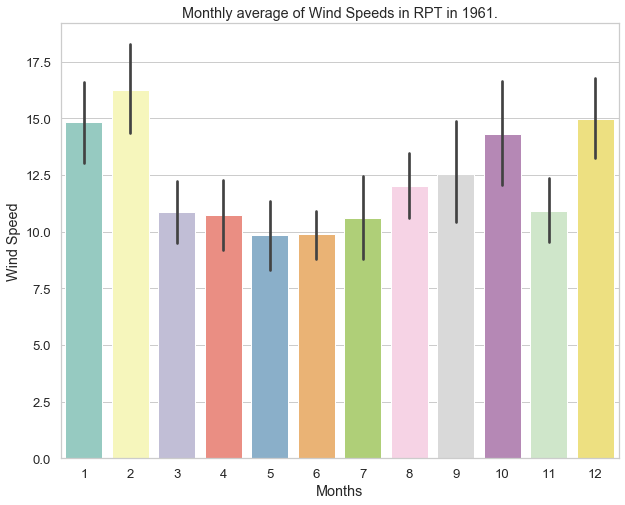

In [43]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)

mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot( x = wind_1961['month'], y = wind_1961['RPT'], palette = 'Set3') 
plt.xlabel('Months')
plt.ylabel('Wind Speed')
plt.title('Monthly average of Wind Speeds in RPT in 1961.')
plt.show()

#### This shows that in 1961, the average wind speed was maximum in the month of February and minimum in the month of May (5) in RPT.

### How does the wind speed change over the years?

In [52]:
mean_1961_to_1978  = list()

mean_1961_to_1978.append(wind_1961.mean().mean())
mean_1961_to_1978.append(wind_1962.mean().mean())
mean_1961_to_1978.append(wind_1963.mean().mean())
mean_1961_to_1978.append(wind_1964.mean().mean())
mean_1961_to_1978.append(wind_1965.mean().mean())
mean_1961_to_1978.append(wind_1966.mean().mean())
mean_1961_to_1978.append(wind_1967.mean().mean())
mean_1961_to_1978.append(wind_1968.mean().mean())
mean_1961_to_1978.append(wind_1969.mean().mean())
mean_1961_to_1978.append(wind_1970.mean().mean())
mean_1961_to_1978.append(wind_1971.mean().mean())
mean_1961_to_1978.append(wind_1972.mean().mean())
mean_1961_to_1978.append(wind_1973.mean().mean())
mean_1961_to_1978.append(wind_1974.mean().mean())
mean_1961_to_1978.append(wind_1975.mean().mean())
mean_1961_to_1978.append(wind_1976.mean().mean())
mean_1961_to_1978.append(wind_1977.mean().mean())
mean_1961_to_1978.append(wind_1978.mean().mean())

#Rounding off to three decimal figures.
mean_1961_to_1978 = np.array(mean_1961_to_1978)
mean_1961_to_1978 = mean_1961_to_1978.round(3)      

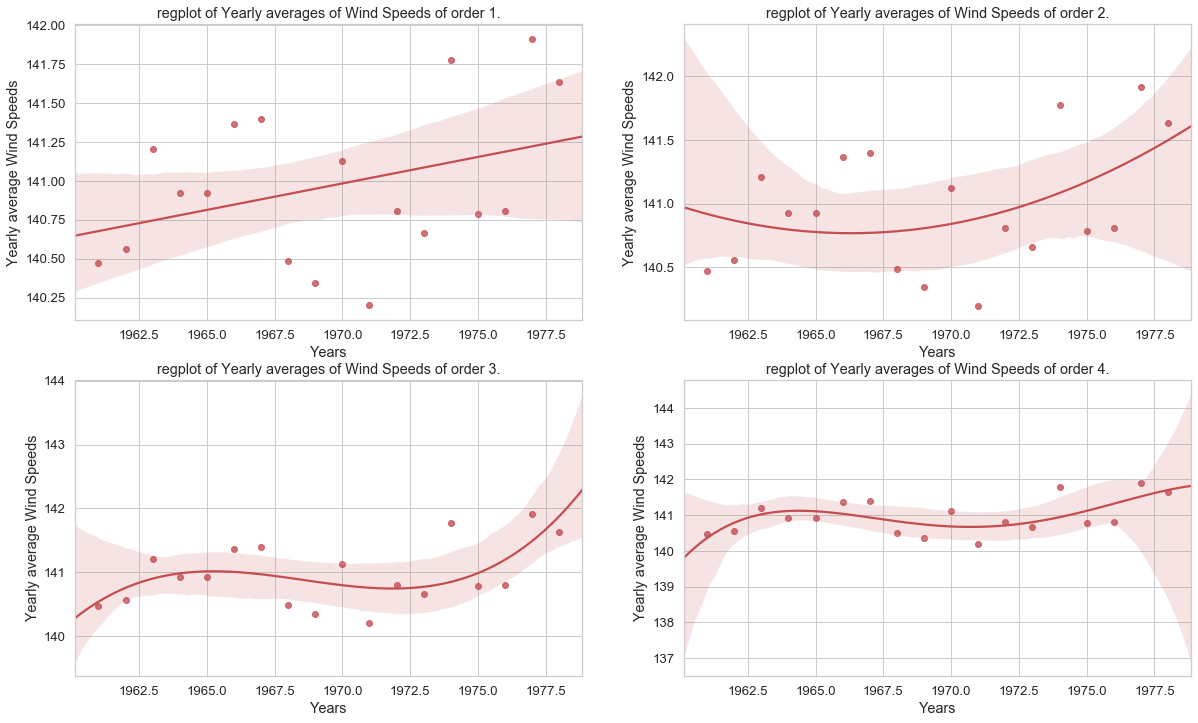

In [88]:
#Plotting a regplot for orders 1,2,3 and 4.

plt.figure( figsize = (20,12) )
sns.set(style = 'whitegrid', font_scale = 1.2)

years = np.arange(1961,1979)

for ii in range(4):
    plt.subplot(2,2,ii+1)
    sns.regplot( x = years , y = mean_1961_to_1978, color = 'r', order = ii+1) 
    plt.xlabel('Years')
    plt.ylabel('Yearly average Wind Speeds')
    plt.title('regplot of Yearly averages of Wind Speeds of order ' + str(ii+1) + '.')

plt.show()

# Plotting days vs. wind speed for RPT for the year 1968.

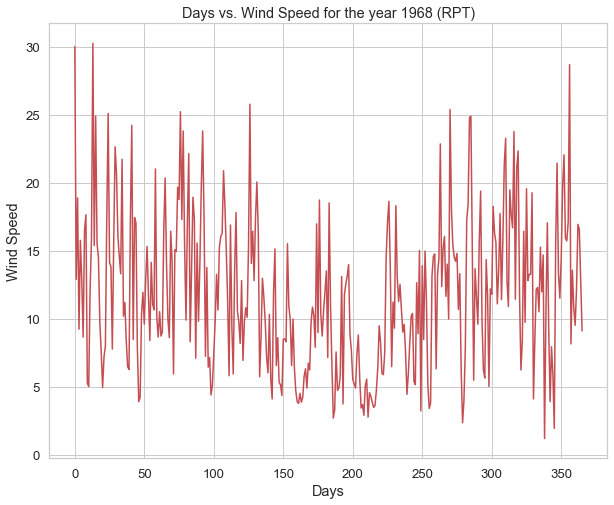

In [86]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)

plt.plot(np.arange(len(wind_1968)) , wind_1968['RPT'], 'r')
plt.xlabel('Days')
plt.ylabel('Wind Speed')
plt.title('Days vs. Wind Speed for the year 1968 (RPT)')
plt.show()

#### Not much significant as we can't really see the trend.

## Creating a swarmplot to see if we can find some trend.

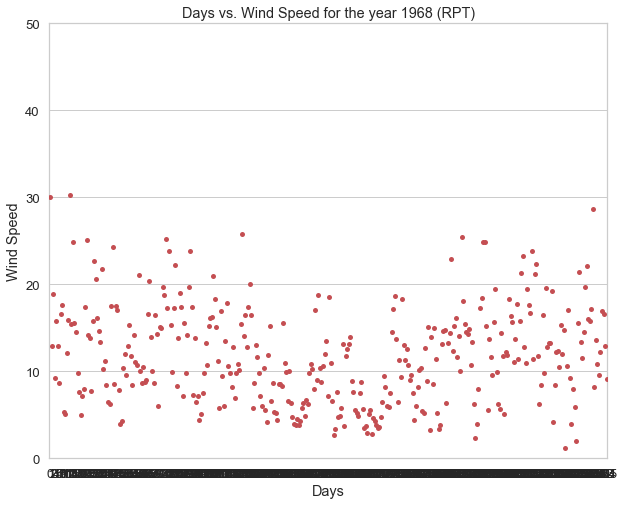

In [92]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.swarmplot(np.arange(len(wind_1968['date'])) , wind_1968['RPT'], color = 'r')
plt.ylim(0,50)
plt.xlabel('Days')
plt.ylabel('Wind Speed')
plt.title('Days vs. Wind Speed for the year 1968 (RPT)')
plt.show()

#### Not that much!

### Creating a reg plot of different orders.

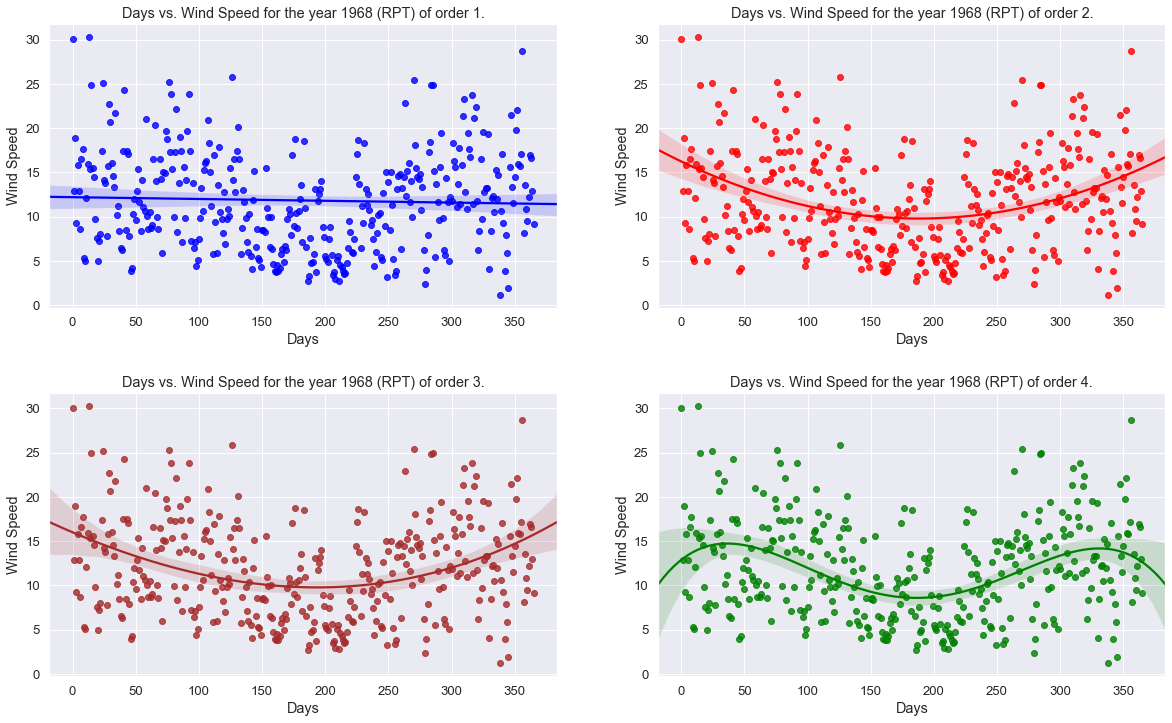

In [106]:
plt.figure( figsize = (20,12) )
sns.set(style = 'darkgrid', font_scale = 1.2)
colors = ['blue', 'red', 'brown', 'green']

for ii in range(1,4+1):
    plt.subplot(2,2,ii)
    sns.regplot(np.arange(len(wind_1968['date'])) , wind_1968['RPT'], color = colors[ii-1],order = ii)

    plt.xlabel('Days')
    plt.ylabel('Wind Speed')
    plt.title('Days vs. Wind Speed for the year 1968 (RPT) of order '+str(ii)+'.')

plt.subplots_adjust(hspace = 0.3)
'''plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    Default values:
    right = 0.9   # the right side of the subplots of the figure
    bottom = 0.1  # the bottom of the subplots of the figure
    top = 0.9     # the top of the subplots of the figure
    wspace = 0.2  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.2  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height'''
plt.show()

#### Drops down in the middle of the year and increases again.

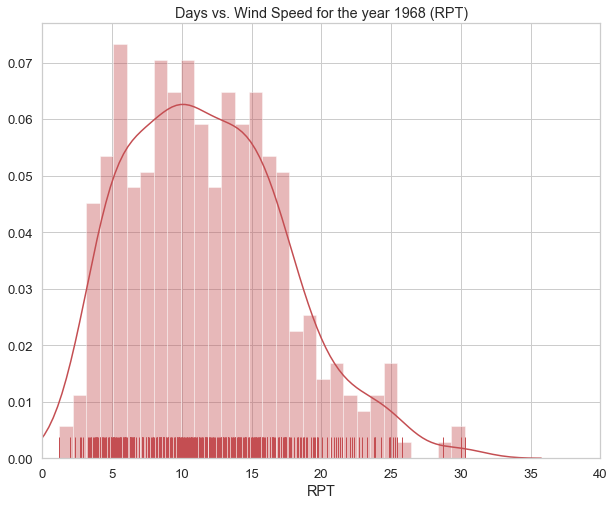

In [122]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.distplot(wind_1968['RPT'],bins = 30, color = 'r', rug = True, kde = True, hist = 1)


plt.title('Days vs. Wind Speed for the year 1968 (RPT)')
plt.xlim(0,40)
plt.show()

In [123]:
wind_1968['RPT'].mean()

11.835628415300544

### Creating a regplot of order 3 for all the locations day-wisely for the year 1968.

In [137]:
locations = list(wind_1968.columns)

#Removing the last 4 columns.
for ii in range(4):
    locations.pop()
    
print(locations)
print(len(locations))


['RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
12


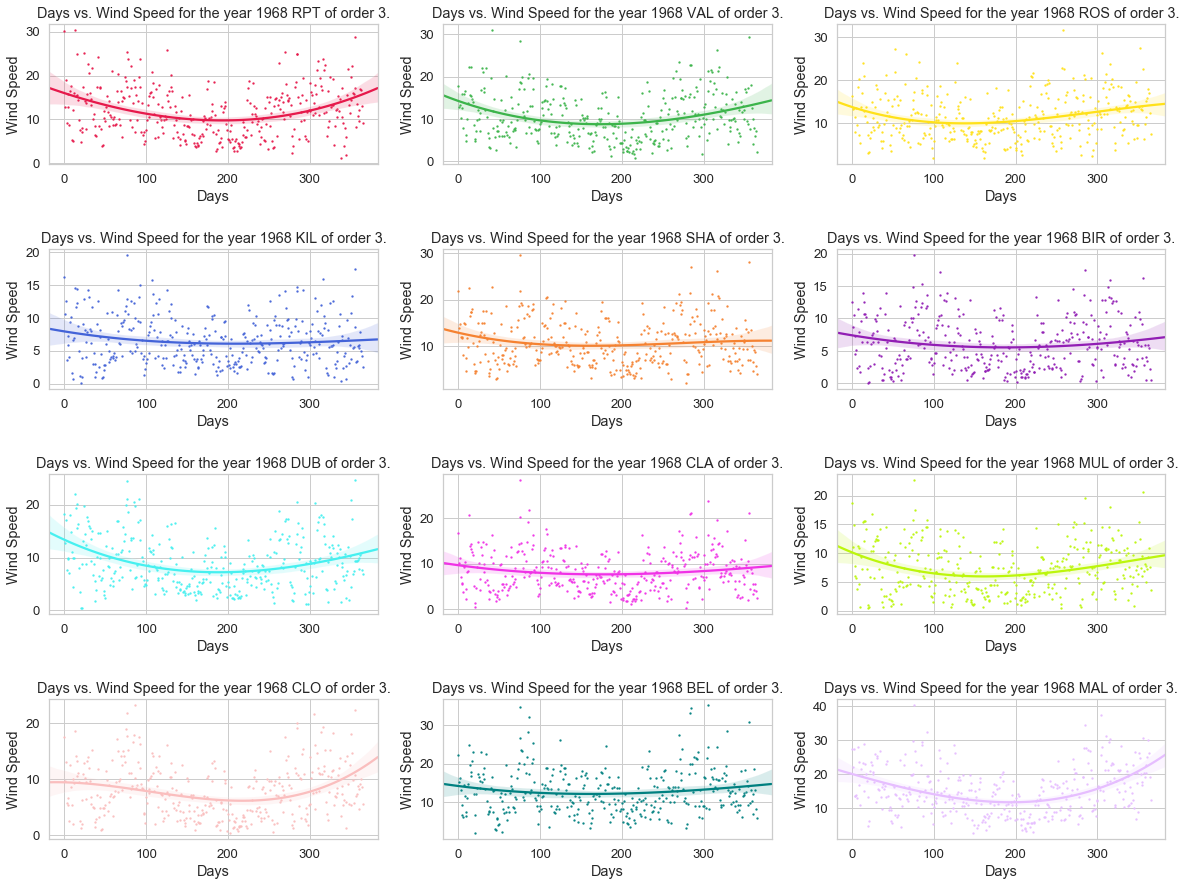

In [147]:
plt.figure( figsize = (20,15) )
sns.set(style = 'whitegrid', font_scale = 1.2)
colors = ['#e6194b', '#3cb44b', '#ffe119',
          '#4363d8', '#f58231','#911eb4', 
          '#46f0f0', '#f032e6', '#bcf60c',
          '#fabebe', '#008080', '#e6beff']

for ii in range( len(locations) ):
    plt.subplot(4,3, ii+1)
    sns.regplot( x = np.arange(len(wind_1968['date'])), y = wind_1968[ locations[ii] ],
                order = 3, scatter_kws={'s':2}, color = colors[ii] )
    
    
    plt.xlabel('Days')
    plt.ylabel('Wind Speed')
    plt.title('Days vs. Wind Speed for the year 1968 ' + str(locations[ii])+ ' of order 3.')

plt.subplots_adjust(hspace = 0.6)
plt.show()

#### More or less the same trend throughout the year.

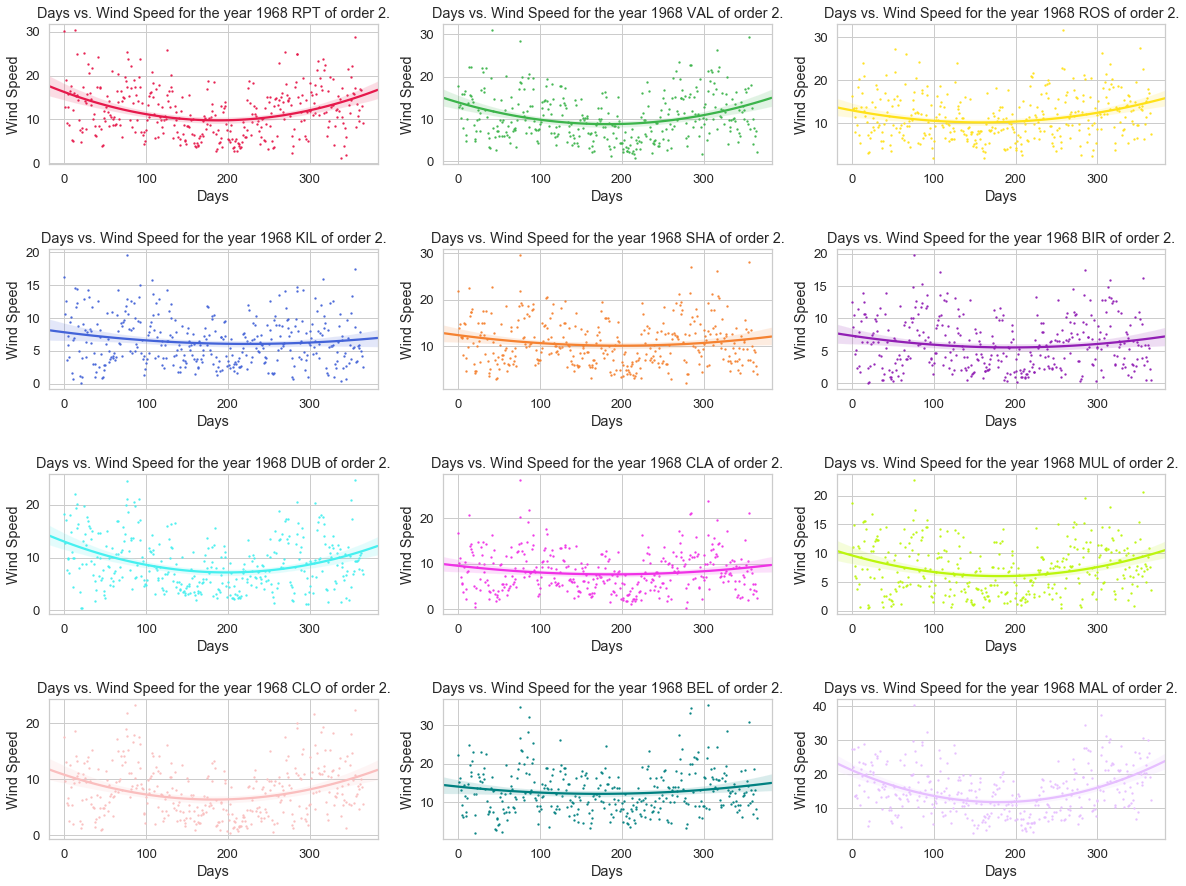

In [150]:
plt.figure( figsize = (20,15) )
sns.set(style = 'whitegrid', font_scale = 1.2)
colors = ['#e6194b', '#3cb44b', '#ffe119',
          '#4363d8', '#f58231','#911eb4', 
          '#46f0f0', '#f032e6', '#bcf60c',
          '#fabebe', '#008080', '#e6beff']

for ii in range( len(locations) ):
    plt.subplot(4,3, ii+1)
    sns.regplot( x = np.arange(len(wind_1968['date'])), y = wind_1968[ locations[ii] ],
                order = 2, scatter_kws={'s':2}, color = colors[ii] )
    
    
    plt.xlabel('Days')
    plt.ylabel('Wind Speed')
    plt.title('Days vs. Wind Speed for the year 1968 ' + str(locations[ii])+ ' of order 2.')

plt.subplots_adjust(hspace = 0.6)
plt.show()

#### The depression is clearer for order 2.

### Creating a regplot of order 3 for all the locations day-wisely for the year 1961.

In [148]:
locations = list(wind_1961.columns)

#Removing the last 4 columns.
for ii in range(4):
    locations.pop()
    
print(locations)
print(len(locations))


['RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
12


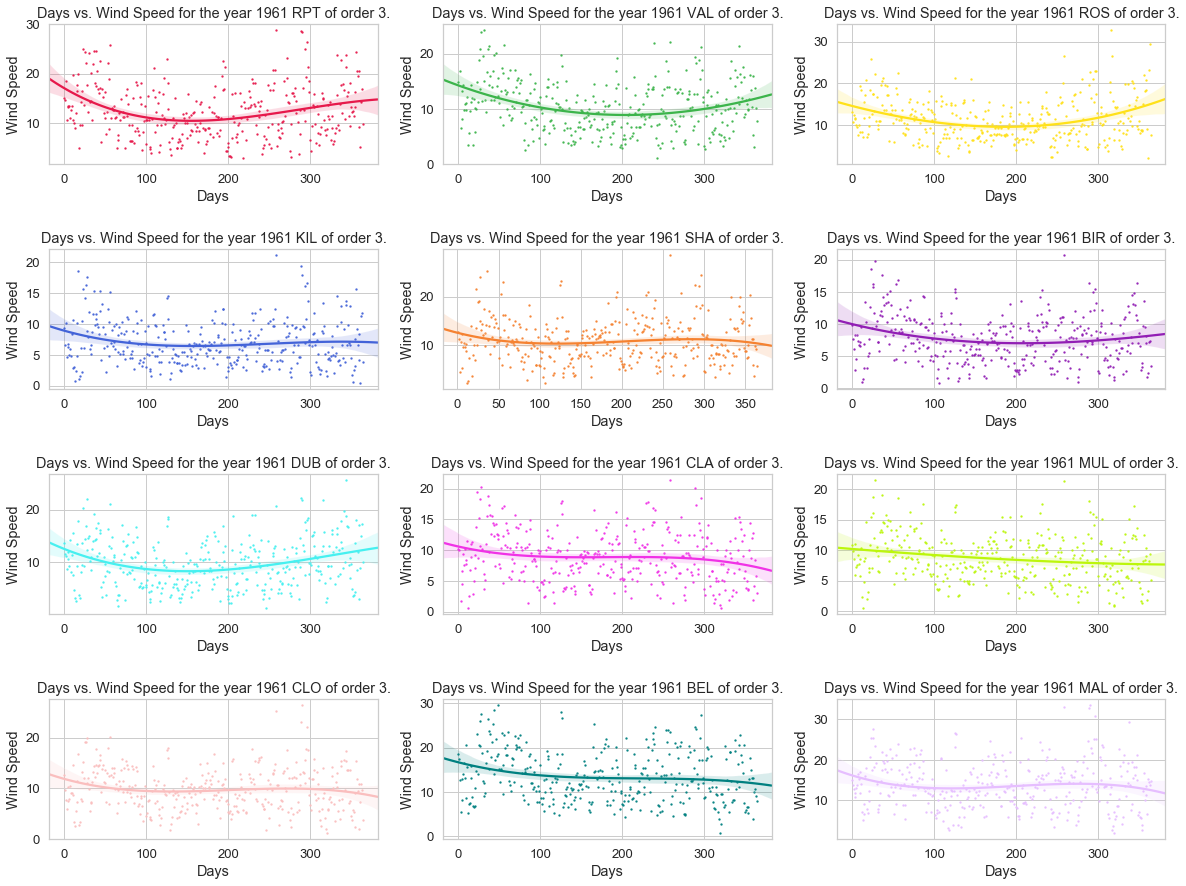

In [151]:
#order = 3
plt.figure( figsize = (20,15) )
sns.set(style = 'whitegrid', font_scale = 1.2)
colors = ['#e6194b', '#3cb44b', '#ffe119',
          '#4363d8', '#f58231','#911eb4', 
          '#46f0f0', '#f032e6', '#bcf60c',
          '#fabebe', '#008080', '#e6beff']

for ii in range( len(locations) ):
    plt.subplot(4,3, ii+1)
    sns.regplot( x = np.arange(len(wind_1961['date'])), y = wind_1961[ locations[ii] ],
                order = 3, scatter_kws={'s':2}, color = colors[ii] )
    
    
    plt.xlabel('Days')
    plt.ylabel('Wind Speed')
    plt.title('Days vs. Wind Speed for the year 1961 ' + str(locations[ii])+ ' of order 3.')

plt.subplots_adjust(hspace = 0.6)
plt.show()

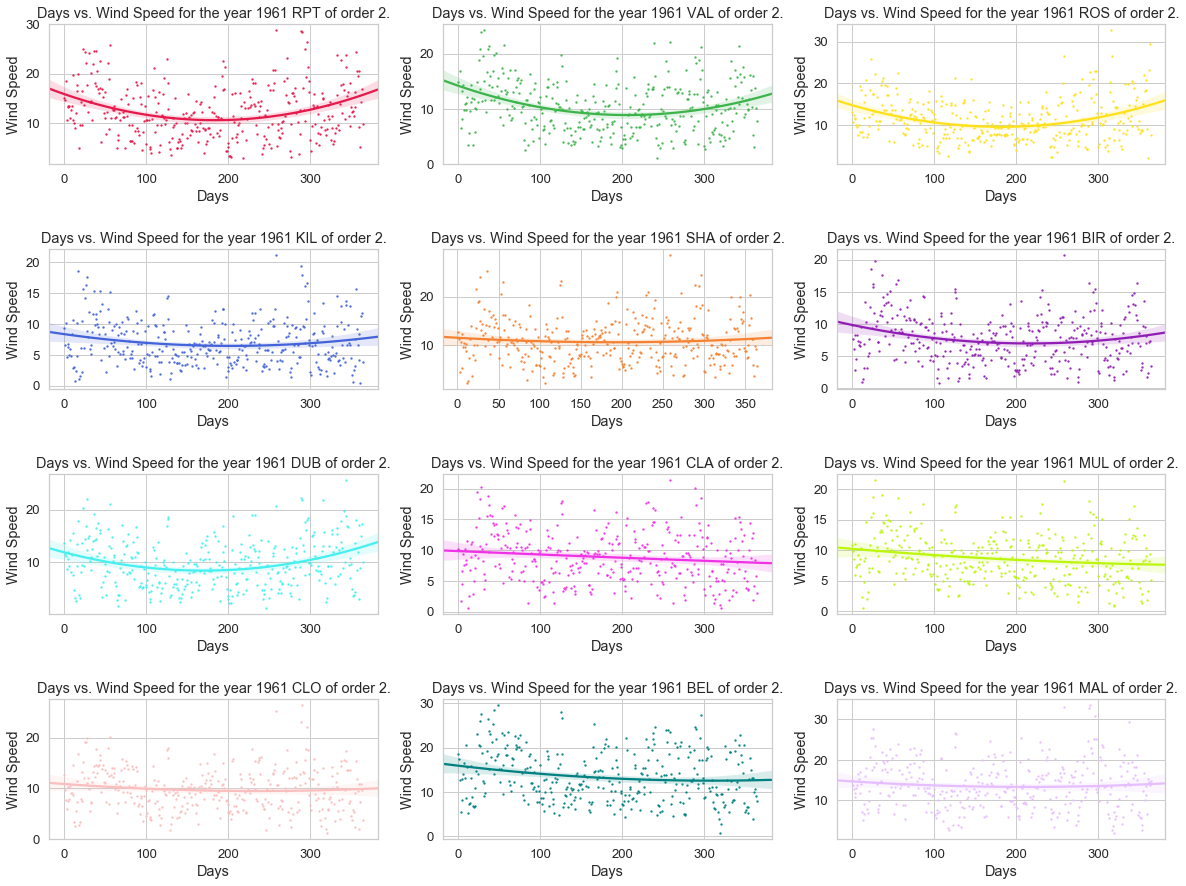

In [152]:
#order =2
plt.figure( figsize = (20,15) )
sns.set(style = 'whitegrid', font_scale = 1.2)
colors = ['#e6194b', '#3cb44b', '#ffe119',
          '#4363d8', '#f58231','#911eb4', 
          '#46f0f0', '#f032e6', '#bcf60c',
          '#fabebe', '#008080', '#e6beff']

for ii in range( len(locations) ):
    plt.subplot(4,3, ii+1)
    sns.regplot( x = np.arange(len(wind_1961['date'])), y = wind_1961[ locations[ii] ],
                order = 2, scatter_kws={'s':2}, color = colors[ii] )
    
    
    plt.xlabel('Days')
    plt.ylabel('Wind Speed')
    plt.title('Days vs. Wind Speed for the year 1961 ' + str(locations[ii])+ ' of order 2.')

plt.subplots_adjust(hspace = 0.6)
plt.show()

### Doing the same for the year 1978.

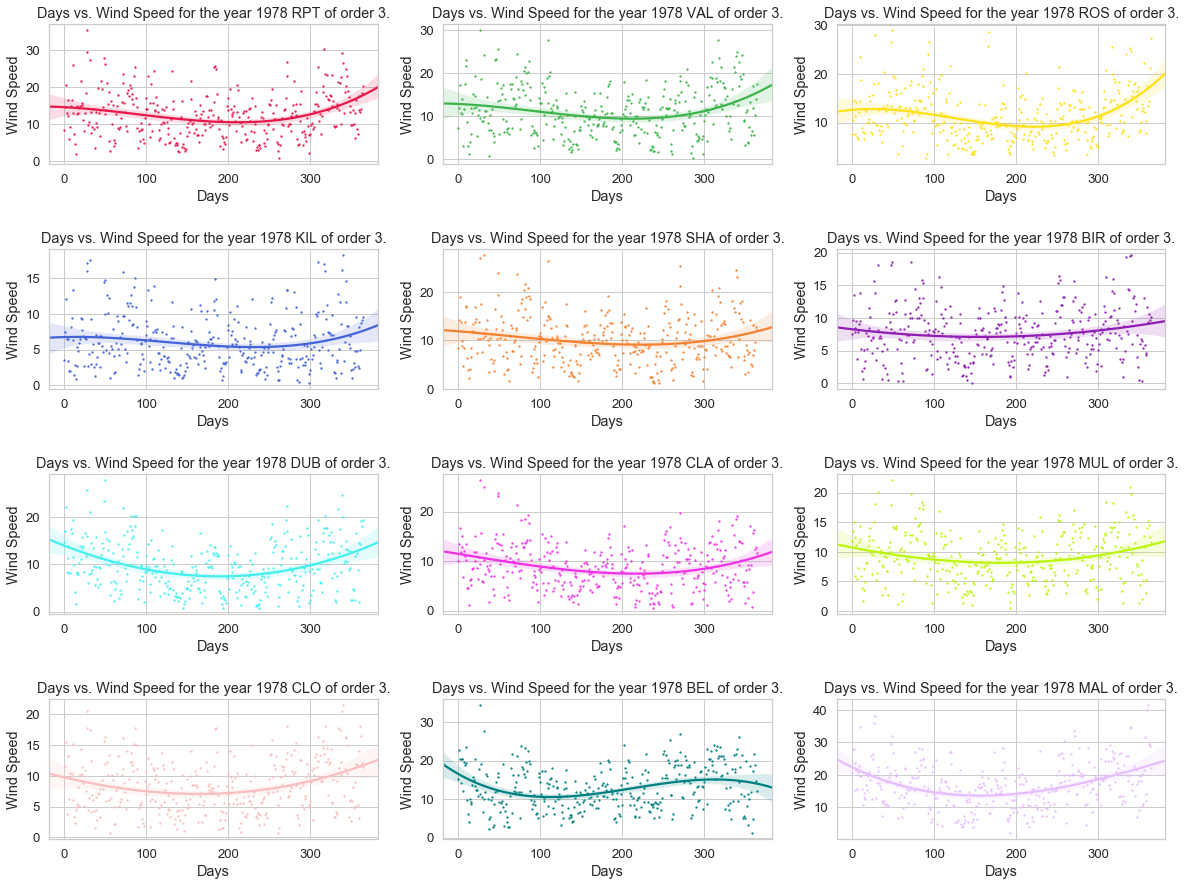

In [153]:
#order = 3
plt.figure( figsize = (20,15) )
sns.set(style = 'whitegrid', font_scale = 1.2)
colors = ['#e6194b', '#3cb44b', '#ffe119',
          '#4363d8', '#f58231','#911eb4', 
          '#46f0f0', '#f032e6', '#bcf60c',
          '#fabebe', '#008080', '#e6beff']

for ii in range( len(locations) ):
    plt.subplot(4,3, ii+1)
    sns.regplot( x = np.arange(len(wind_1978['date'])), y = wind_1978[ locations[ii] ],
                order = 3, scatter_kws={'s':2}, color = colors[ii] )
    
    
    plt.xlabel('Days')
    plt.ylabel('Wind Speed')
    plt.title('Days vs. Wind Speed for the year 1978 ' + str(locations[ii])+ ' of order 3.')

plt.subplots_adjust(hspace = 0.6)
plt.show()

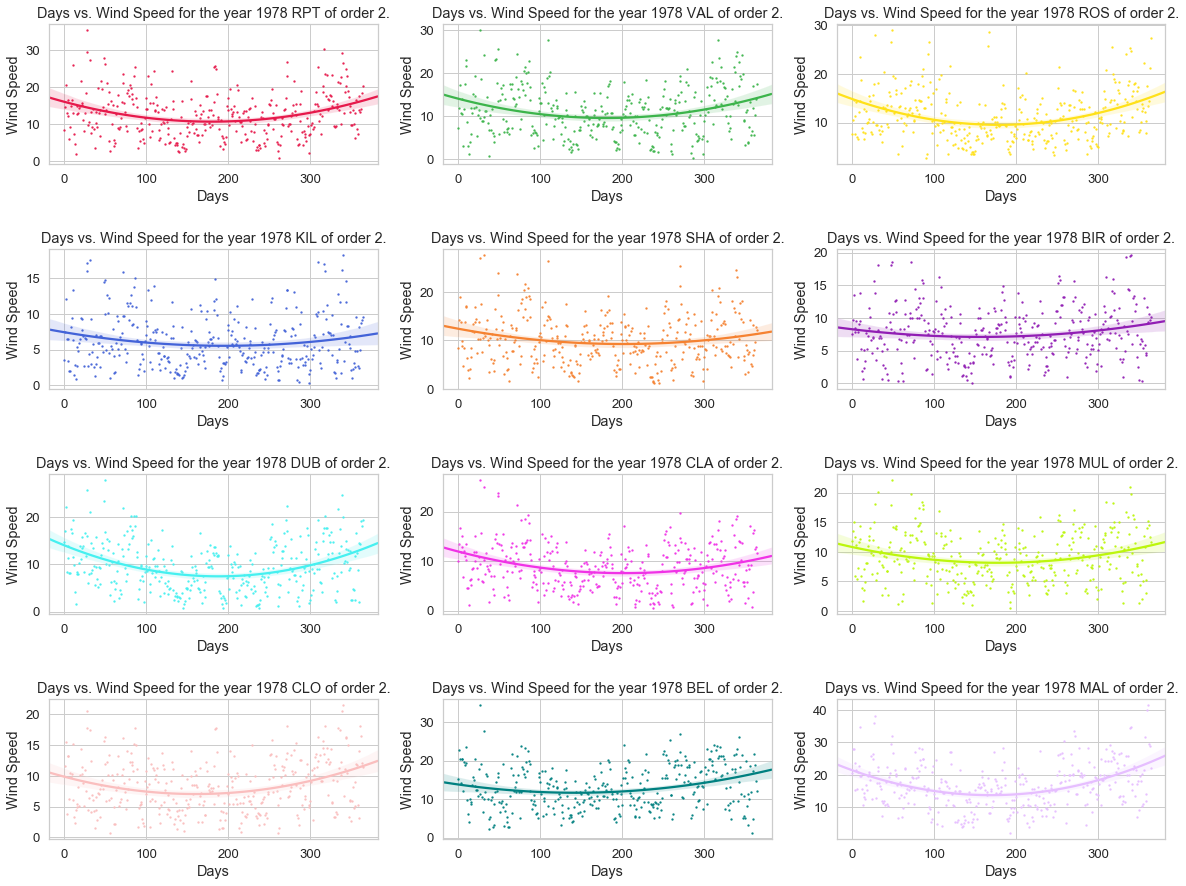

In [154]:
#order =2
plt.figure( figsize = (20,15) )
sns.set(style = 'whitegrid', font_scale = 1.2)
colors = ['#e6194b', '#3cb44b', '#ffe119',
          '#4363d8', '#f58231','#911eb4', 
          '#46f0f0', '#f032e6', '#bcf60c',
          '#fabebe', '#008080', '#e6beff']

for ii in range( len(locations) ):
    plt.subplot(4,3, ii+1)
    sns.regplot( x = np.arange(len(wind_1978['date'])), y = wind_1978[ locations[ii] ],
                order = 2, scatter_kws={'s':2}, color = colors[ii] )
    
    
    plt.xlabel('Days')
    plt.ylabel('Wind Speed')
    plt.title('Days vs. Wind Speed for the year 1978 ' + str(locations[ii])+ ' of order 2.')

plt.subplots_adjust(hspace = 0.6)
plt.show()

#### Better seen for order 2.

### For a particular location, say, DUB, finding the trend from 1961 to 1978 as a whole.


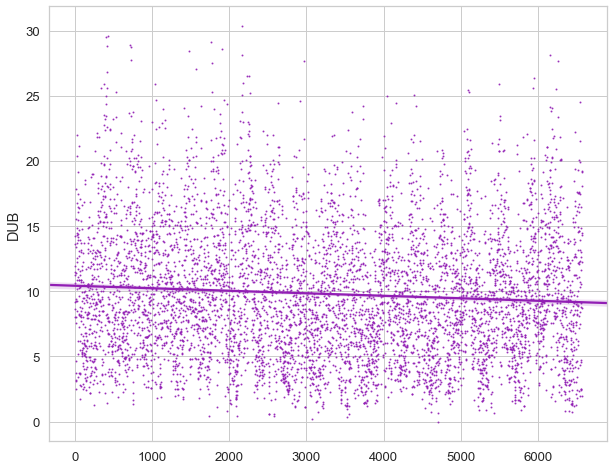

In [168]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)
colors = ['#e6194b', '#3cb44b', '#ffe119',
          '#4363d8', '#f58231','#911eb4', 
          '#46f0f0', '#f032e6', '#bcf60c',
          '#fabebe', '#008080', '#e6beff']

#wind_DUB_1961_1978
sns.regplot( x = np.arange(wind.shape[0]), y = wind['DUB'],
                order = 1, scatter_kws={'s':1}, color = colors[5] )
plt.show()

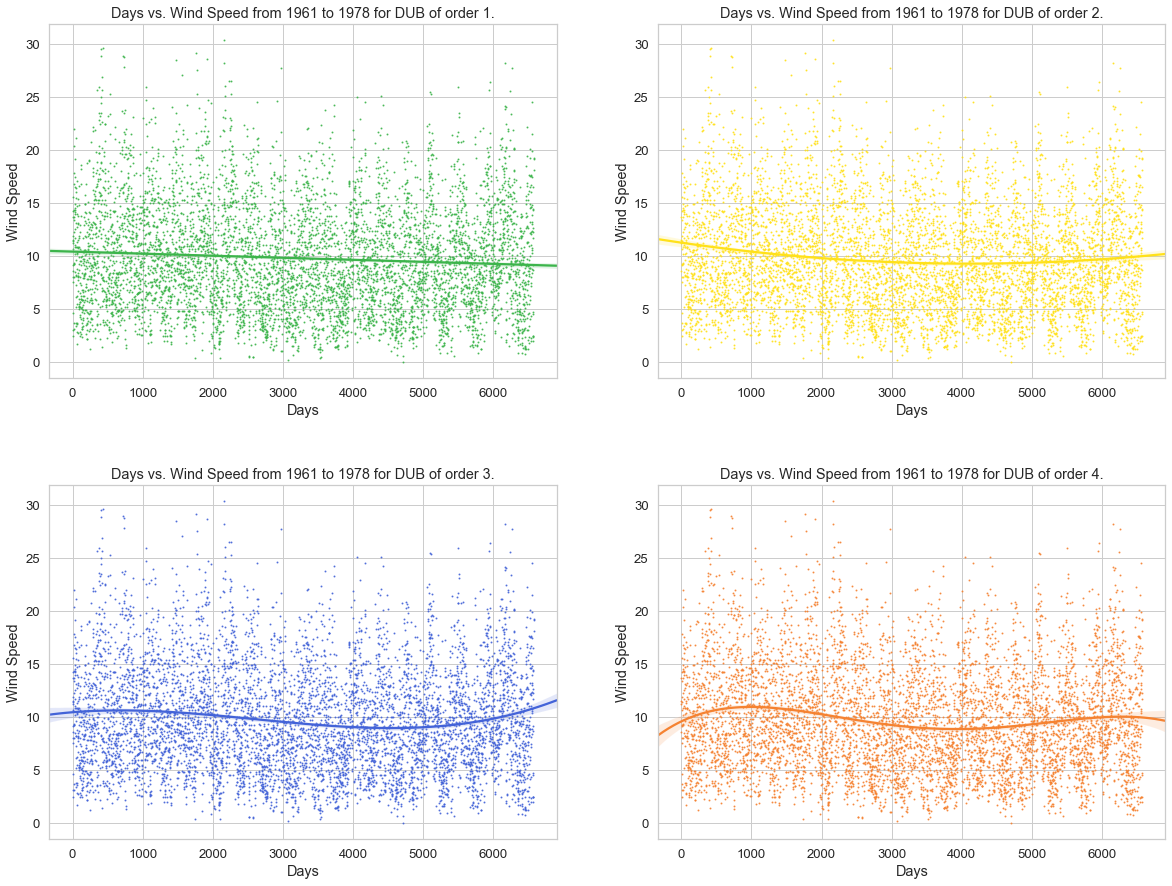

In [174]:
plt.figure( figsize = (20,15) )
sns.set(style = 'whitegrid', font_scale = 1.2)
colors = ['#e6194b', '#3cb44b', '#ffe119',
          '#4363d8', '#f58231','#911eb4', 
          '#46f0f0', '#f032e6', '#bcf60c',
          '#fabebe', '#008080', '#e6beff']

for ii in range(1,4+1):
    plt.subplot(2,2,ii)
    sns.regplot( x = np.arange(wind.shape[0]), y = wind['DUB'],
                order = ii, scatter_kws={'s':1}, color = colors[ii] )
    plt.xlabel('Days')
    plt.ylabel('Wind Speed')
    plt.title('Days vs. Wind Speed from 1961 to 1978 for DUB of order '+ str(ii)+ '.')

plt.subplots_adjust(hspace = 0.3)
plt.show()

In [173]:
wind.describe()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,year,month,day
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000,6574.000000,6574.000000,6574.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079,1969.500304,6.523274,15.728628
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794,5.188131,3.448871,8.800335
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000,1961.000000,1.000000,1.000000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000,1965.000000,4.000000,8.000000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000,1969.500000,7.000000,16.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000,1974.000000,10.000000,23.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000,1978.000000,12.000000,31.000000
